In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Getting packages (add more later)

In [5]:
df = pd.read_excel("NBA_game_data.xlsx")

dfb = pd.read_excel("NBA_bio_data.xlsx")

adding the two Dataframes

In [6]:
merged_df = pd.merge(df, dfb, on=['Year', 'PLAYER_ID','Season_type','GP','PTS','REB','AST','TEAM_ID'])
merged_df.to_excel('ALL_DATA.xlsx', index=False)


merge the two Dataframes

In [7]:
merged_df.head()

,Year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,...,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT
0,2012-13,Regular%20Season,201142,1,Kevin Durant,1610612760,OKC,81,3119,731,...,USA,2007,1,2,12.2,0.017,0.179,0.295,0.647,0.213
1,2012-13,Regular%20Season,977,2,Kobe Bryant,1610612747,LAL,78,3013,738,...,USA,1996,1,13,1.9,0.022,0.116,0.313,0.570,0.286
2,2012-13,Regular%20Season,2544,3,LeBron James,1610612748,MIA,76,2877,765,...,USA,2003,1,1,12.3,0.039,0.180,0.294,0.640,0.344
3,2012-13,Regular%20Season,201935,4,James Harden,1610612745,HOU,78,2985,585,...,USA,2009,1,3,2.9,0.021,0.105,0.285,0.600,0.257
4,2012-13,Regular%20Season,2546,5,Carmelo Anthony,1610612752,NYK,67,2482,669,...,USA,2003,1,3,6.2,0.055,0.142,0.349,0.560,0.137


In [8]:
# merged_df.to_excel('DATA.xlsx', index=False)

export to xlsx to view, vscode cant seem to view this well


In [9]:
# filtered_df = merged_df[merged_df['PLAYER'] == 'Kevin Durant']

In [10]:
# sorted_df = filtered_df.sort_index(axis=1)
sorted_df = merged_df.sort_index(axis=1)


In [11]:
column_order = ['Year', 'PLAYER','RANK', *df.columns.difference(['Year', 'PLAYER','RANK'])]

# Reorder the columns based on the desired column order
df = df.reindex(columns=column_order)
df

,Year,PLAYER,RANK,AST,AST_TOV,BLK,DREB,EFF,FG3A,FG3M,...,PF,PLAYER_ID,PTS,REB,STL,STL_TOV,Season_type,TEAM,TEAM_ID,TOV
0,2012-13,Kevin Durant,1,374,1.34,105,594,2462,334,139,...,143,201142,2280,640,116,0.41,Regular%20Season,OKC,1610612760,280
1,2012-13,Kobe Bryant,2,469,1.63,25,367,1921,407,132,...,173,977,2133,433,106,0.37,Regular%20Season,LAL,1610612747,287
2,2012-13,LeBron James,3,551,2.44,67,513,2446,254,103,...,110,2544,2036,610,129,0.57,Regular%20Season,MIA,1610612748,226
3,2012-13,James Harden,4,455,1.54,38,317,1872,486,179,...,178,201935,2023,379,142,0.48,Regular%20Season,HOU,1610612745,295
4,2012-13,Carmelo Anthony,5,171,0.98,32,326,1553,414,157,...,205,2546,1920,460,52,0.30,Regular%20Season,NYK,1610612752,175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8044,2022-23,Thanasis Antetokounmpo,194,0,0.00,0,0,0,0,0,...,0,203648,0,0,0,0.00,Playoffs,MIL,1610612749,0
8045,2022-23,Thomas Bryant,194,0,0.00,0,0,0,0,0,...,0,1628418,0,0,0,0.00,Playoffs,DEN,1610612743,0
8046,2022-23,Udonis Haslem,194,0,0.00,0,1,-2,1,0,...,0,2617,0,1,0,0.00,Playoffs,MIA,1610612748,0
8047,2022-23,Vlatko Cancar,194,1,0.00,0,3,-1,4,0,...,0,1628427,0,3,0,0.00,Playoffs,DEN,1610612743,0


In [ ]:
df.to_excel('Sorted_Data.xlsx', index=False)

In [67]:
df = pd.read_excel("ALL_DATA.xlsx")


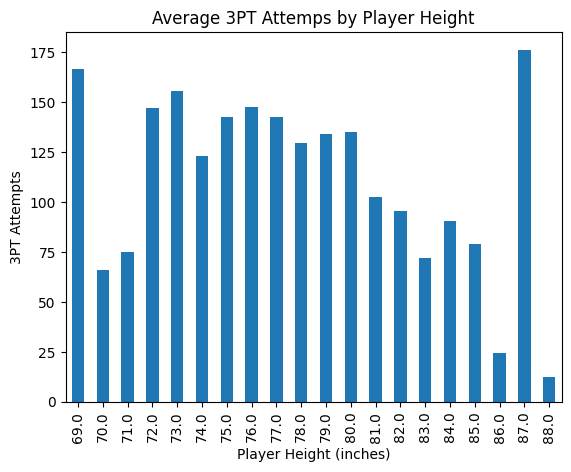

In [74]:
# Threshold 3PA at 3
df = df[df['FG3A'] >= 3]

# Drop players without a height
df = df.dropna(subset=['PLAYER_HEIGHT_INCHES'])

# For each PLAYER_HEIGHT, get the average 3PT attempted
avg_atp_by_height = df.groupby('PLAYER_HEIGHT_INCHES')['FG3A'].mean()

# Graph the average FG3_PCT for each PLAYER_HEIGHT_INCHES (y-label is FG3_PCT)
avg_atp_by_height.plot(kind='bar', y='FG3A', title='Average 3PT Attemps by Player Height') 
plt.ylabel('3PT Attempts')
plt.xlabel('Player Height (inches)')
plt.show()

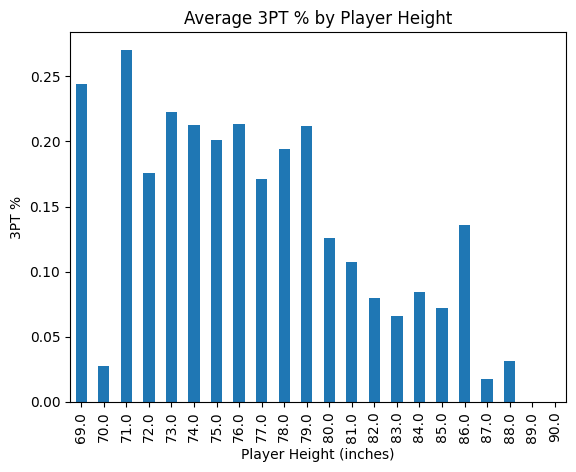

In [69]:
# For each PLAYER_HEIGHT, get the average FG3_PCT
avg_per_by_height = df.groupby('PLAYER_HEIGHT_INCHES')['FG3_PCT'].mean()

# Graph the average FG3_PCT for each PLAYER_HEIGHT_INCHES (y-label is FG3_PCT)
avg_by_height.plot(kind='bar', y='FG3_PCT', title='Average 3PT % by Player Height') 
plt.ylabel('3PT %')
plt.xlabel('Player Height (inches)')
plt.show()


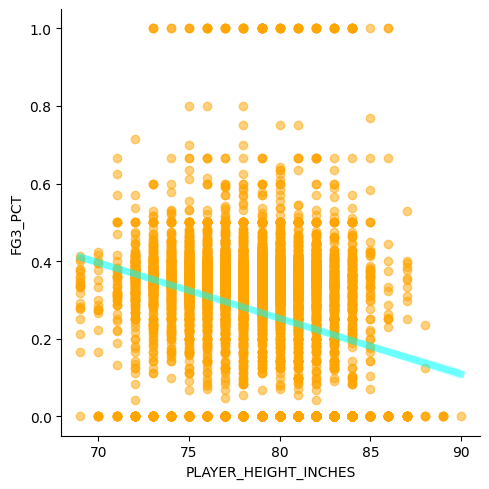

In [64]:
# Scatter plot of all players with their FG3_PCT and PLAYER_HEIGHT_INCHES
sns.lmplot(data=df, x='PLAYER_HEIGHT_INCHES', y='FG3_PCT', 
            scatter_kws={'alpha':0.5, 'color': 'orange'},
            line_kws={'color': 'cyan', 'linewidth': 5, 'alpha':0.5})
plt.show()

<Axes: title={'center': 'Total 3PT Attempts by Season'}, xlabel='Year'>

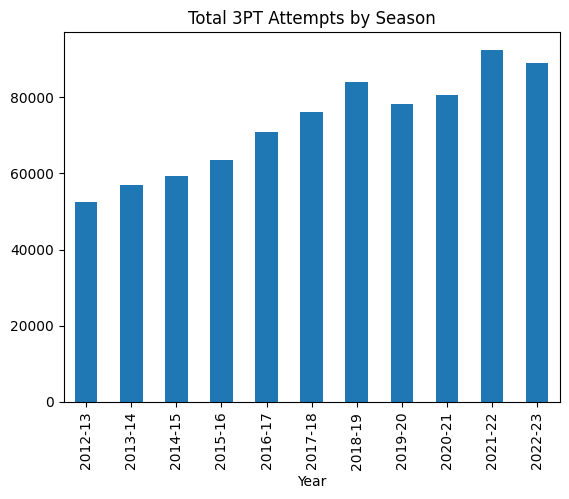

In [70]:
# Total 3pt attempts by season
total_3pt_attempts = df.groupby('Year')['FG3A'].sum()

# Graph the total 3pt attempts by season
total_3pt_attempts.plot(kind='bar', y='FG3A', title='Total 3PT Attempts by Season')

Score: 0.014233077476271006


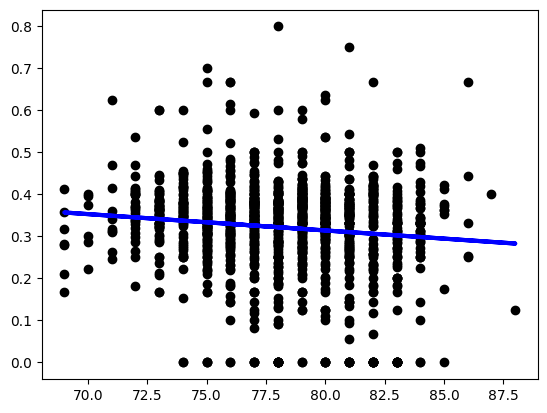

In [78]:
# Predict 3pt % based on height
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create a LinearRegression object
lr = LinearRegression()

# Create a training and test set
X_train, X_test, y_train, y_test = train_test_split(df[['PLAYER_HEIGHT_INCHES']], df[['FG3_PCT']], test_size=0.2, random_state=42)

# Fit the model to the training data (learn the coefficients)
lr.fit(X_train, y_train)

print("Score:", lr.score(X_test, y_test))

# Predict the test set
y_pred = lr.predict(X_test)

# Plot the test set and the predicted set
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()


